<font color=darkred>

# Soc220: Computational Text Analysis

## Lab 12: Network extensions

### April 26 2018

<img src="images/moby_dick.jpg" , style="width: 650px"/>


***
***

<img src="images/twitter_joke.png" , style="width: 450px"/>

https://twitter.com/DevilleSy/status/983670860165902336

***
***

### TERM-TERM MATRIX

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()

dubois_text_list = ['The problem of the twentieth century is the problem of the color line.', 
'The cost of liberty is less than the price of repression.',
'To be a poor man is hard, but to be a poor race in a land of dollars is the very bottom of hardships.', 
'Believe in life! Always human beings will live and progress to greater, broader, and fuller life.']

dtm_df = pd.DataFrame(countvec.fit_transform(dubois_text_list).toarray(), columns=countvec.get_feature_names())
dtm_df.astype(bool) #change the type in cell to boolean
dtm_df

,always,and,be,beings,believe,bottom,broader,but,century,color,...,problem,progress,race,repression,than,the,to,twentieth,very,will
0,0,0,0,0,0,0,0,0,1,1,...,2,0,0,0,0,4,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,0,0,0,0
2,0,0,2,0,0,1,0,1,0,0,...,0,0,1,0,0,1,2,0,1,0
3,1,2,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [3]:
%%time
import numpy as np
ttm = np.matmul(dtm_df.T,dtm_df)
np.fill_diagonal(ttm, 0)

df_ttm = pd.DataFrame(ttm,
            columns=countvec.get_feature_names(),
            index=countvec.get_feature_names())

CPU times: user 1.23 ms, sys: 668 µs, total: 1.9 ms
Wall time: 1.66 ms


In [4]:
df_ttm = pd.DataFrame(ttm,
            columns=countvec.get_feature_names(),
            index=countvec.get_feature_names())

In [13]:
#!pip3 install nxviz

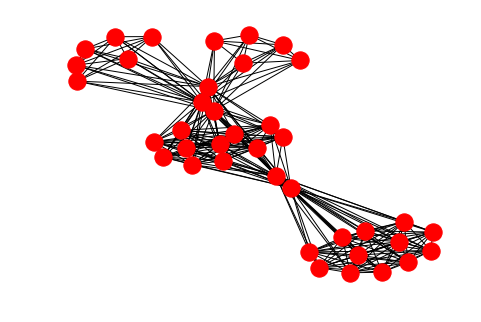

In [6]:
import networkx as nx

G = nx.from_pandas_adjacency(df_ttm)
nx.draw(G)

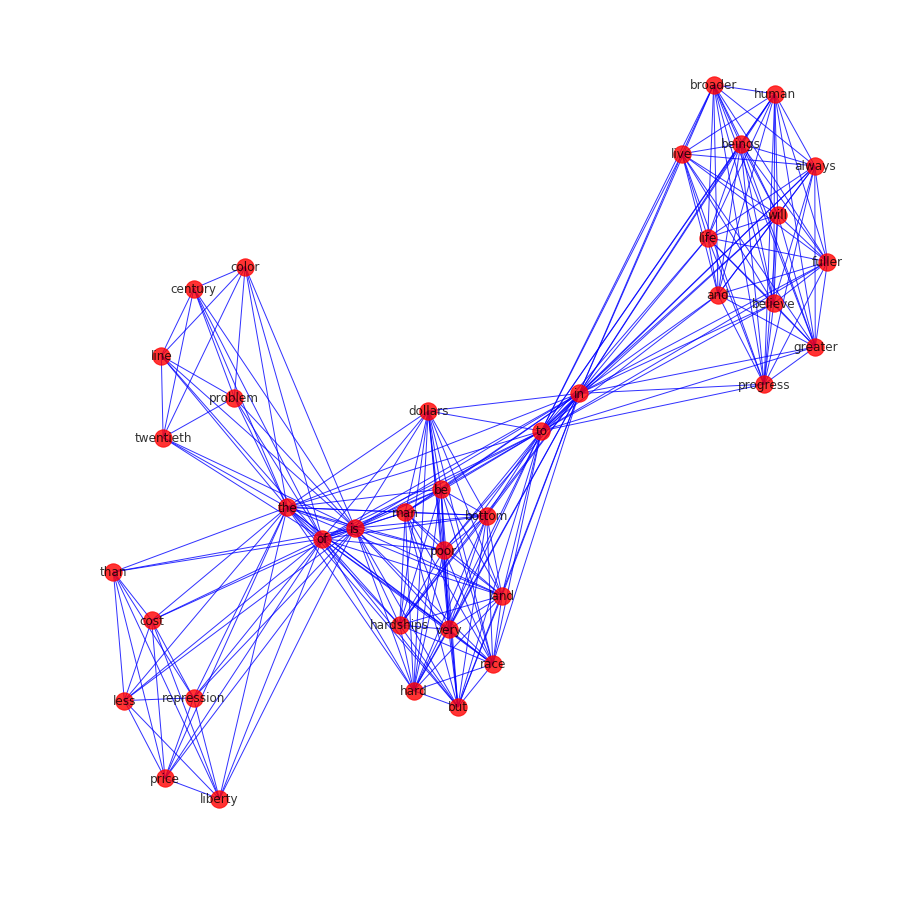

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
nx.draw(G,pos=nx.spring_layout(G),alpha=0.8,edge_color='b',with_labels=True) 

### LEXICAL SHIFTS

In [210]:
import pandas as pd

sotu_xls = pd.ExcelFile('sotu.xlsx')
sotu_xls

In [211]:
df_sotu = sotu_xls.parse('Sheet1')
df_sotu.head()

,sotu_text,president,year,years_active,party,sotu_type
1,Fellow-Citizens of the Senate and House of Rep...,George Washington,1790,1789-1793,Nonpartisan,speech
2,\n\n Fellow-Citizens of the Senate and House o...,George Washington,1790,1789-1793,Nonpartisan,speech
3,\n\n Fellow-Citizens of the Senate and House o...,George Washington,1791,1789-1793,Nonpartisan,speech
4,Fellow-Citizens of the Senate and House of Rep...,George Washington,1792,1789-1793,Nonpartisan,speech
5,\n\n Fellow-Citizens of the Senate and House o...,George Washington,1793,1793-1797,Nonpartisan,speech


In [212]:
df_sotu_1 = df_sotu.loc[(df_sotu['year'] > 1790) & (df_sotu['year'] < 1835)]
df_sotu_2 = df_sotu.loc[(df_sotu['year'] > 1855) & (df_sotu['year'] < 1895)]
df_sotu_3 = df_sotu.loc[(df_sotu['year'] > 1915) & (df_sotu['year'] < 1954)]
df_sotu_4 = df_sotu.loc[(df_sotu['year'] > 1975) & (df_sotu['year'] < 2014)]

In [213]:
list_sotu_dfs = [df_sotu_1,df_sotu_2,df_sotu_3,df_sotu_4]

In [214]:
import re

sotu_speeches = " ".join(df_sotu_1.sotu_text)
sotu_speeches = sotu_speeches.replace('\r', '').replace('\\t', '').replace("-",'')

In [215]:
%%time
import spacy
spacy_nlp = spacy.load('en')
sotu_spacys = []

for speech in sotu_speeches.split('\n'):
    
    if len(speech) > 0:
        non_empty_speech = speech
        
        spacy_of_speech = spacy_nlp(non_empty_speech)
        sotu_spacys.append(spacy_of_speech)
        
    else:
        pass

CPU times: user 1min 4s, sys: 5.1 s, total: 1min 9s
Wall time: 45.1 s


In [216]:
sotu_nouns_only = []

for spacy_object in sotu_spacys:
    
    nouns = [token.text for token in spacy_object if token.pos_ == 'NOUN']
    
    #subset to those involving the constitution but not including the constituion
    if 'constitution' in nouns:
        nouns = [token for token in nouns if token != 'constitution']
        sotu_speech = " ".join(nouns)
        sotu_nouns_only.append(sotu_speech)
    else:
        pass

In [217]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

dtm = pd.DataFrame(count_vectorizer.fit_transform(sotu_nouns_only).toarray(),
                  columns=count_vectorizer.get_feature_names())
dtm.astype(bool)
dtm.head()

,acknowledgment,acts,address,administration,adoption,advantage,affairs,aid,allegiance,amity,...,times,universe,university,usefulness,weight,who,whole,will,year,years
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
4,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


In [219]:
%%time
import numpy as np
ttm = np.matmul(dtm.T,dtm)
np.fill_diagonal(ttm, 0)

df_ttm = pd.DataFrame(ttm,
            columns=count_vectorizer.get_feature_names(),
            index=count_vectorizer.get_feature_names())

CPU times: user 1.54 ms, sys: 953 µs, total: 2.49 ms
Wall time: 1.38 ms


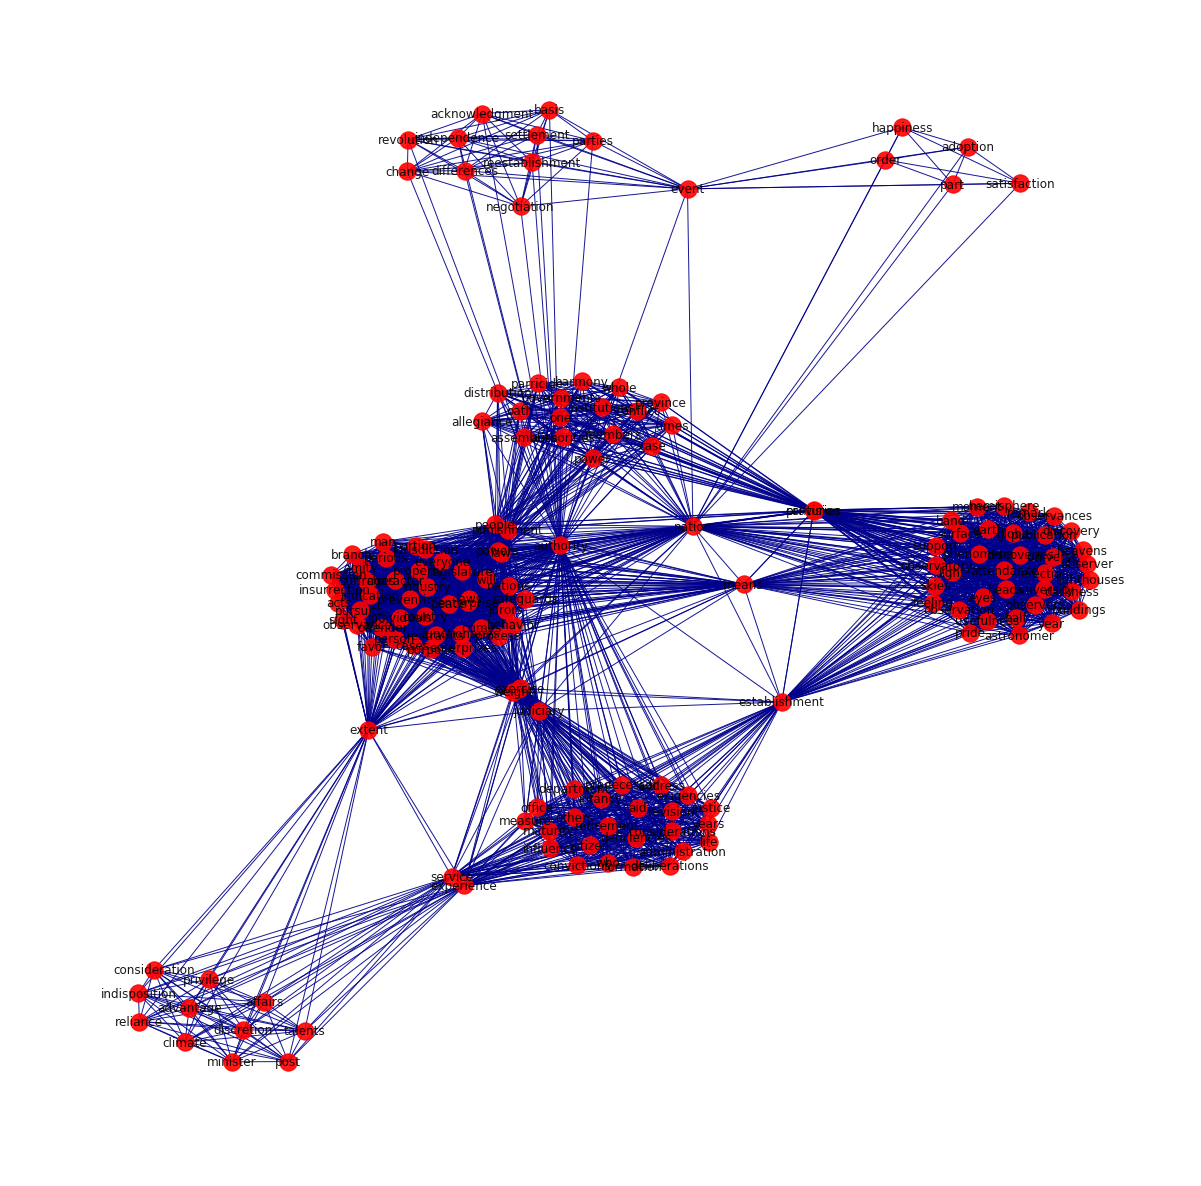

In [222]:
import networkx as nx

G = nx.from_pandas_adjacency(df_ttm)
plt.figure(figsize=(16,16))
nx.draw(G,pos=nx.spring_layout(G),alpha=0.9,edge_color='darkblue',with_labels=True) 

### Rule et al. Figure 1

In [224]:
%%time

sotu_as_graphs = []

for time_period in list_sotu_dfs:
    
    #pull text together
    sotu_speeches = " ".join(time_period.sotu_text)
    
    #split on paragraph and convert to spacy object
    sotu_spacys = []
    
    for speech in sotu_speeches.split('\n'):
        if len(speech) > 0:
            non_empty_speech = speech
            spacy_of_speech = spacy_nlp(non_empty_speech)
            sotu_spacys.append(spacy_of_speech)
        else:
            pass
    print('good to go for creating spacy object')
    
    #select only nouns associated with constitution
    sotu_nouns_only = []

    for spacy_object in sotu_spacys:
        nouns = [token.text for token in spacy_object if token.pos_ == 'NOUN']
    
        if 'constitution' in nouns:
            nouns = [token for token in nouns if token != 'constitution']
            sotu_speech = " ".join(nouns)
            sotu_nouns_only.append(sotu_speech)
        else:
            pass
    print('good to go for creating extracting nouns')
    
    #from nouns convert to ttm
    count_vectorizer = CountVectorizer()
    dtm = pd.DataFrame(count_vectorizer.fit_transform(sotu_nouns_only).toarray(),
                  columns=count_vectorizer.get_feature_names())
    
    ttm = np.matmul(dtm.T,dtm)
    np.fill_diagonal(ttm, 0)
    print('good to go for creating ttm')
    
    df_ttm = pd.DataFrame(ttm,
            columns=count_vectorizer.get_feature_names(),
            index=count_vectorizer.get_feature_names())
    
    #create graph object
    G = nx.from_pandas_adjacency(df_ttm)
    
    #append out
    sotu_as_graphs.append(G)

good to go for creating spacy object
good to go for creating extracting nouns
good to go for creating ttm
good to go for creating spacy object
good to go for creating extracting nouns
good to go for creating ttm
good to go for creating spacy object
good to go for creating extracting nouns
good to go for creating ttm
good to go for creating spacy object
good to go for creating extracting nouns
good to go for creating ttm
CPU times: user 6min 49s, sys: 29.4 s, total: 7min 18s
Wall time: 4min 40s


In [225]:
sotu_as_graphs

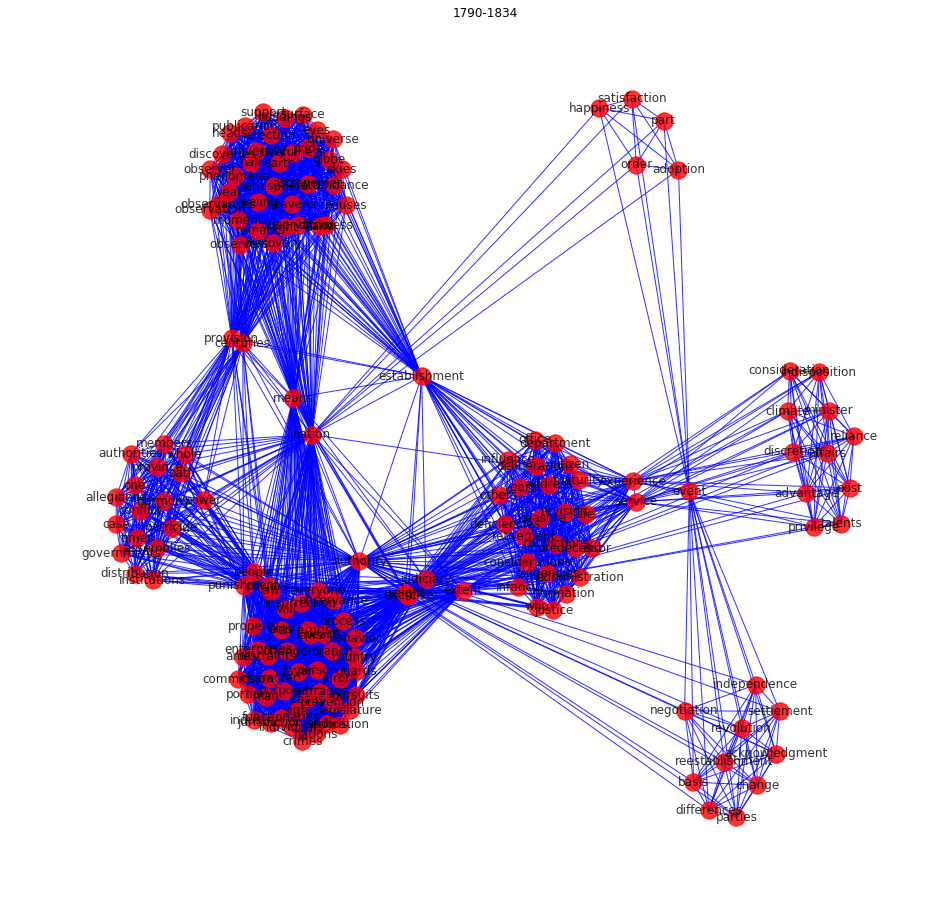

In [226]:
plt.figure(figsize=(16,16))
plt.title('1790-1834')
nx.draw(sotu_as_graphs[0],pos=nx.spring_layout(sotu_as_graphs[0]),alpha=0.8,edge_color='b',with_labels=True) 

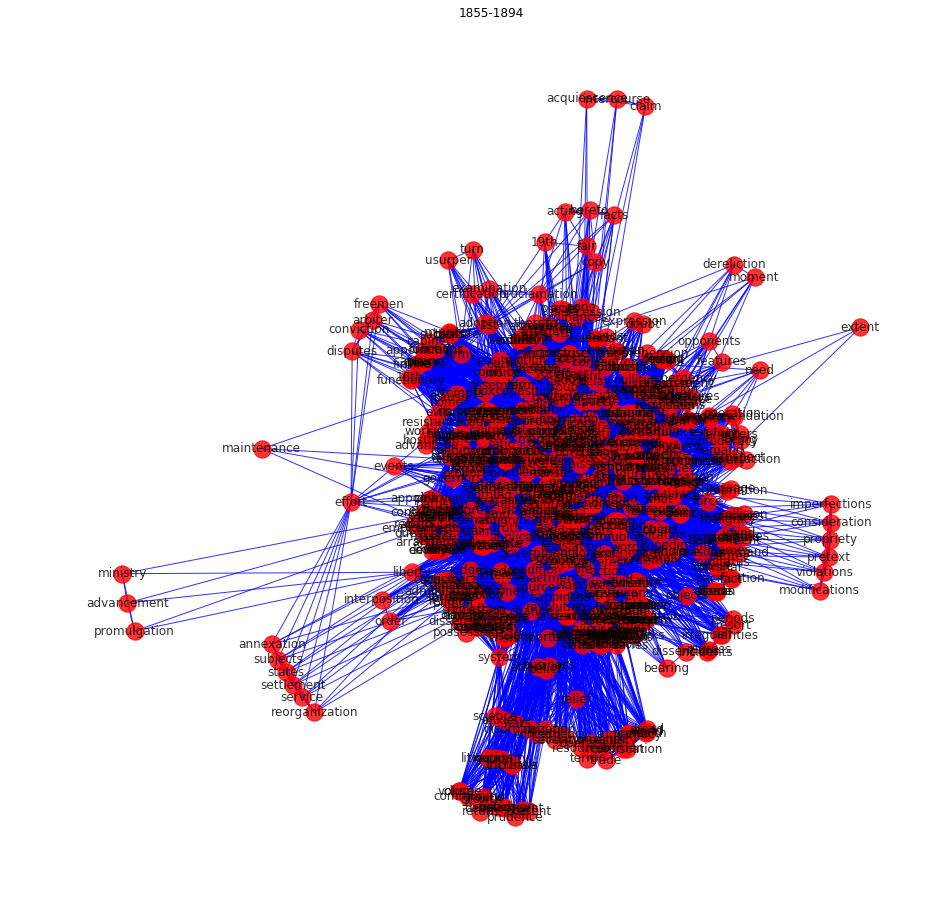

In [227]:
plt.figure(figsize=(16,16))
plt.title('1855-1894')
#spring_layout
nx.draw(sotu_as_graphs[1],pos=nx.spring_layout(sotu_as_graphs[1]),alpha=0.8,edge_color='b',with_labels=True) 

In [228]:
import operator
sorted_nodes = sorted(nx.degree_centrality(sotu_as_graphs[1]).items(),
                                           key=lambda x: x[1])
list(reversed(sorted_nodes))[:20]

[('people', 0.7253886010362693),
 ('act', 0.5716753022452504),
 ('country', 0.5544041450777202),
 ('state', 0.5457685664939551),
 ('power', 0.5371329879101899),
 ('election', 0.49222797927461137),
 ('time', 0.4870466321243523),
 ('government', 0.47668393782383417),
 ('laws', 0.43005181347150256),
 ('majority', 0.42141623488773744),
 ('slavery', 0.4110535405872193),
 ('condition', 0.3920552677029361),
 ('who', 0.37478411053540583),
 ('delegates', 0.3644214162348877),
 ('admission', 0.3609671848013817),
 ('convention', 0.35924006908462863),
 ('law', 0.3540587219343696),
 ('question', 0.33678756476683935),
 ('sovereignty', 0.3298791018998273),
 ('war', 0.3229706390328152)]

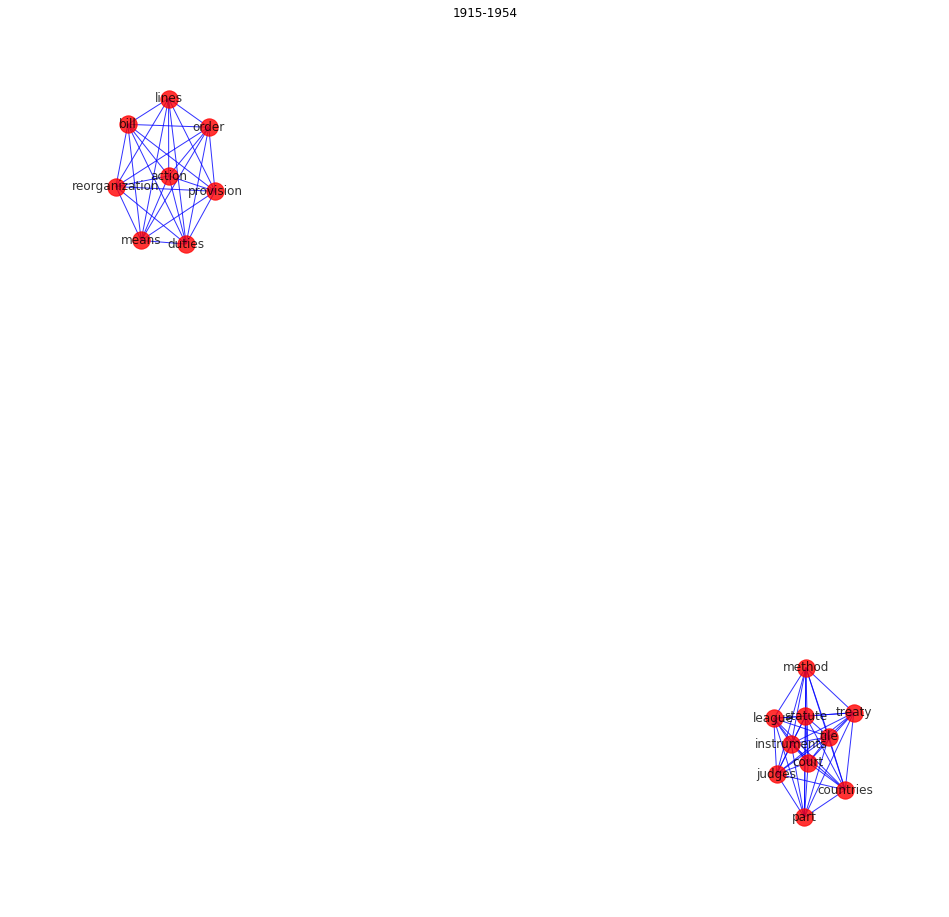

In [229]:
plt.figure(figsize=(16,16))
plt.title('1915-1954')
nx.draw(sotu_as_graphs[2],pos=nx.spring_layout(sotu_as_graphs[2]),alpha=0.8,edge_color='b',with_labels=True) 

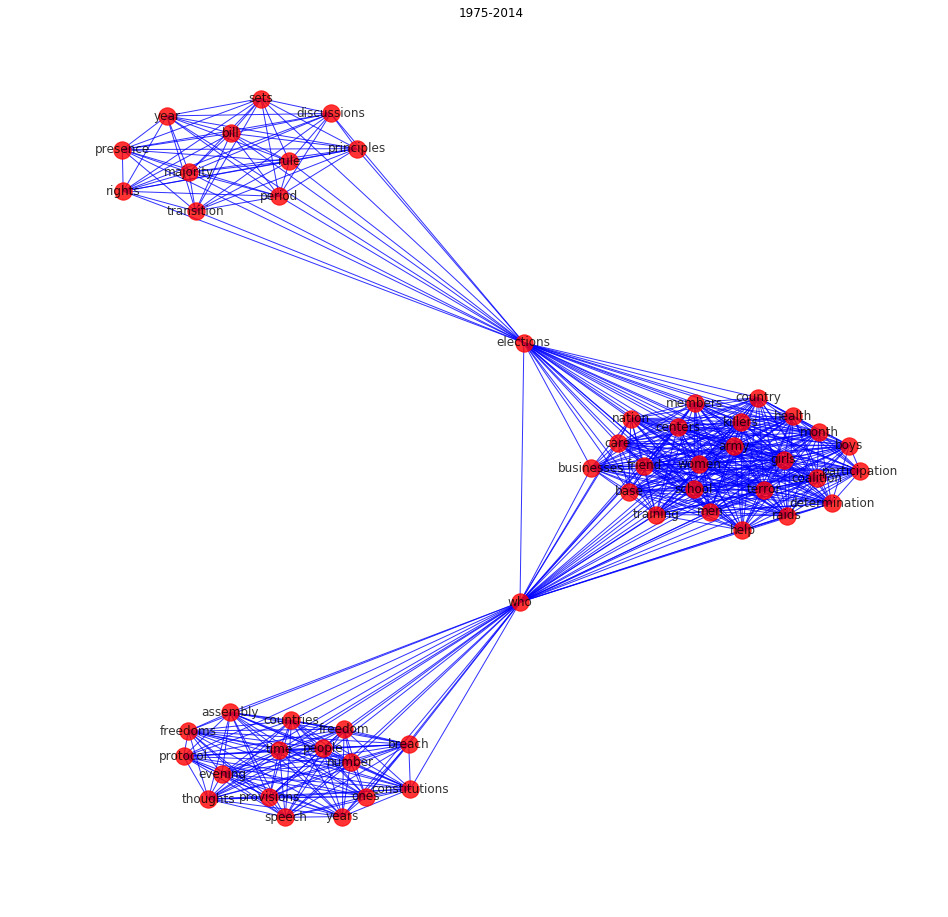

In [230]:
plt.figure(figsize=(16,16))
plt.title('1975-2014')
nx.draw(sotu_as_graphs[3],pos=nx.spring_layout(sotu_as_graphs[3]),alpha=0.8,edge_color='b',with_labels=True) 

### EXTRACTING SOCIAL NETWORKS FROM TEXTS

In [11]:
mansfield_park_text = open("mansfield_park.txt",'r').read() 

In [12]:
#"divides the text into 10-paragraph segments
mansfield_park_text[:4000]

"\ufeffThe Project Gutenberg EBook of Mansfield Park, by Jane Austen\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Mansfield Park\n\nAuthor: Jane Austen\n\nRelease Date: June, 1994  [Etext #141]\nPosting Date: February 11, 2015\nLast Updated: March 10, 2018\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MANSFIELD PARK ***\n\n\n\n\nProduced by An Anonymous Volunteer\n\n\n\n\n\nMANSFIELD PARK\n\n(1814)\n\n\nBy Jane Austen\n\n\n\n\nCHAPTER I\n\nAbout thirty years ago Miss Maria Ward, of Huntingdon, with only seven\nthousand pounds, had the good luck to captivate Sir Thomas Bertram, of\nMansfield Park, in the county of Northampton, and to be thereby raised\nto the rank of a baronet's lady, with all the comforts and conseq

In [13]:
segments = [mansfield_park_text.split('\n\n')[i:i+10] for i in range(0, len(mansfield_park_text.split('\n\n')), 10)]

In [14]:
#str(segments[20])

In [15]:
#" ".join(segments[20]).replace('\\', '').replace('\n', '').replace("\'",'')

In [16]:
%%time
import spacy
spacy_nlp = spacy.load('en')

segments_spacy = []

for segement in segments:
    
    string_segment= " ".join(segement)
    cleaned_string_segment = string_segment.replace('\\', '').replace('\n', '').replace("\'",'')
    
    spacy_segment = spacy_nlp(cleaned_string_segment)
    
    segments_spacy.append(spacy_segment)

CPU times: user 41.1 s, sys: 8.17 s, total: 49.3 s
Wall time: 31.1 s


In [28]:
dir(segments_spacy[5][52])

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'l

In [183]:
characters_only = []

for spacy_object in segments_spacy:
    
    #singular_proper_nouns = [token.text for token in spacy_object if token.pos_ == 'PROPN']
    singular_proper_nouns = [word.text for word in spacy_object if word.tag_ == 'NNP']
    
    #persons = [ent.text for ent in spacy_object.ents if ent.label_ == 'PERSON']
    #all_people_in_segment = proper_nouns.extend(persons)
    
    #remove salutations
    #singular_proper_nouns = [singular_proper_nouns.remove('Sir') for segment in singular_proper_nouns]
    try:
        singular_proper_nouns = [singular_proper_nouns.remove('Sir') for segment in singular_proper_nouns]
    except ValueError:
        pass
    try:
        singular_proper_nouns = [singular_proper_nouns.remove('Miss') for segment in singular_proper_nouns]
    except ValueError:
        pass
    try:
        singular_proper_nouns = [singular_proper_nouns.remove('Mr.') for segment in singular_proper_nouns]
    except ValueError:
        pass
    try:
        singular_proper_nouns = [singular_proper_nouns.remove('Mr') for segment in singular_proper_nouns]
    except ValueError:
        pass
    try:
        singular_proper_nouns = [singular_proper_nouns.remove('Mrs.') for segment in singular_proper_nouns]
    except ValueError:
        pass
    try:
        singular_proper_nouns = [singular_proper_nouns.remove('dr.') for segment in singular_proper_nouns]
    except ValueError:
        pass
    
    characters_only.append(singular_proper_nouns)
    

In [184]:
characters_only

[['\ufeffThe',
  'Project',
  'Gutenberg',
  'EBook',
  'Mansfield',
  'Park',
  'Jane',
  'Austen',
  'eBook',
  'Project',
  'Gutenberg',
  'License',
  'eBook',
  'www.gutenberg.org',
  'Mansfield',
  'Park',
  'Jane',
  'Austen',
  'Release',
  'June',
  'February',
  'March',
  'English',
  'Character',
  'START',
  'PROJECT',
  'GUTENBERG',
  'EBOOK',
  'MANSFIELD',
  'PARK',
  'Anonymous',
  'Volunteer'],
 ['MANSFIELD',
  'PARK',
  'Jane',
  'Austen',
  'Maria',
  'Ward',
  'Huntingdon',
  'Thomas',
  'Bertram',
  'ofMansfield',
  'Park',
  'Northampton',
  'Huntingdon',
  'Ward',
  'Frances',
  'Maria',
  'Ward',
  'Rev.',
  'Norris',
  'Frances',
  'Wards',
  'Thomasbeing',
  'Norris',
  'Francesmarried',
  'Thomas',
  'Bertram',
  'Lady',
  'Bertrams',
  'Pricenever',
  'LadyBertram',
  'Mrs',
  'Norris',
  'Fanny',
  'Thomas',
  'Norriscould',
  'Thomas',
  'Norris',
  'Fanny',
  'Price',
  'Lady',
  'Bertram',
  'ina',
  'Thomas',
  'West',
  'Thomas',
  'East',
  'Thomas',

In [323]:
def create_ttm(list_of_list):
    
    list_string = [" ".join(text) for text in list_of_list]
    
    from sklearn.feature_extraction.text import CountVectorizer
    countvec = CountVectorizer(min_df=.15) #min_df = .15 * len(list_of_list)
    
    dtm_df = pd.DataFrame(countvec.fit_transform(list_string).toarray(), columns=countvec.get_feature_names())
    dtm_df.astype(bool)

    #standardize the weights
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    dtm_scaled = pd.DataFrame(min_max_scaler.fit_transform(dtm_df))
    
    import numpy as np
    ttm = np.matmul(dtm_scaled.T,dtm_scaled) # dtm_df
    np.fill_diagonal(ttm, 0)

    df_ttm = pd.DataFrame(ttm,
            columns=countvec.get_feature_names(),
            index=countvec.get_feature_names())
    
    return df_ttm

In [324]:
mansfeld_park_ttm = create_ttm(characters_only)

In [325]:
mansfeld_park_ttm

,bertram,bertrams,crawford,crawfords,dr,edmund,fanny,fannys,grant,henry,...,maria,mary,norris,park,parsonage,price,rushworth,thomas,tom,william
bertram,0.000000,4.777778,4.564815,1.333333,1.148148,4.432099,6.735043,3.518519,2.634921,2.688889,...,3.000000,1.407407,4.086420,2.055556,1.851852,2.422222,2.987654,3.500000,4.000000,1.761905
bertrams,4.777778,0.000000,4.250000,1.750000,1.250000,4.333333,7.923077,4.000000,2.857143,2.600000,...,3.166667,2.250000,4.444444,3.000000,2.000000,3.700000,3.333333,3.375000,3.500000,1.428571
crawford,4.564815,4.250000,0.000000,4.687500,1.958333,6.787037,13.025641,7.055556,3.964286,6.150000,...,3.277778,2.138889,2.666667,2.104167,4.027778,4.000000,4.416667,3.770833,3.145833,3.750000
crawfords,1.333333,1.750000,4.687500,0.000000,0.541667,2.222222,5.134615,1.916667,1.142857,1.750000,...,1.541667,0.791667,1.222222,0.937500,1.583333,1.250000,2.055556,2.187500,1.500000,1.642857
dr,1.148148,1.250000,1.958333,0.541667,0.000000,1.444444,2.743590,2.222222,4.309524,1.433333,...,0.500000,0.722222,1.185185,1.708333,1.222222,1.133333,0.796296,0.986111,0.833333,0.476190
edmund,4.432099,4.333333,6.787037,2.222222,1.444444,0.000000,9.615385,5.777778,3.142857,2.555556,...,2.907407,1.259259,2.987654,2.250000,2.851852,3.288889,3.703704,3.518519,4.888889,2.111111
fanny,6.735043,7.923077,13.025641,5.134615,2.743590,9.615385,0.000000,10.641026,4.791209,6.015385,...,4.371795,3.243590,5.923077,3.230769,4.846154,6.984615,4.777778,6.576923,5.519231,5.868132
fannys,3.518519,4.000000,7.055556,1.916667,2.222222,5.777778,10.641026,0.000000,3.047619,3.133333,...,1.777778,2.222222,2.814815,2.250000,3.777778,2.733333,2.111111,2.916667,2.250000,2.571429
grant,2.634921,2.857143,3.964286,1.142857,4.309524,3.142857,4.791209,3.047619,0.000000,3.114286,...,1.357143,1.452381,2.031746,2.178571,1.952381,1.314286,1.650794,2.178571,1.464286,0.755102
henry,2.688889,2.600000,6.150000,1.750000,1.433333,2.555556,6.015385,3.133333,3.114286,0.000000,...,3.533333,2.633333,1.377778,1.200000,1.800000,2.040000,2.422222,2.566667,3.650000,2.142857


In [326]:
# weights should be number of degrees

In [327]:
np.round(mansfeld_park_ttm['crawford']['edmund'])

7.0

In [328]:
edge_list = []

for source in mansfeld_park_ttm.index.values:
    for target in mansfeld_park_ttm.index.values:
        #edge_list.append((target,source,mansfeld_park_ttm[source][target]))
        for i in range(int(np.round(mansfeld_park_ttm[source][target]))):
            edge_list.append((target,source))

In [329]:
mansfield_park_el = pd.DataFrame(edge_list,columns=('source','target')) #,'weight' 

In [330]:
mansfield_park_el.tail()

,source,target
1417,price,william
1418,thomas,william
1419,thomas,william
1420,thomas,william
1421,tom,william


In [331]:
import matplotlib.pyplot as plt
import networkx as nx

#G = nx.from 
G = nx.from_pandas_edgelist(mansfield_park_el,'source','target') #,edge_attr=True

In [332]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 24\nNumber of edges: 266\nAverage degree:  22.1667'

In [333]:
#nx.degree_centrality(G)

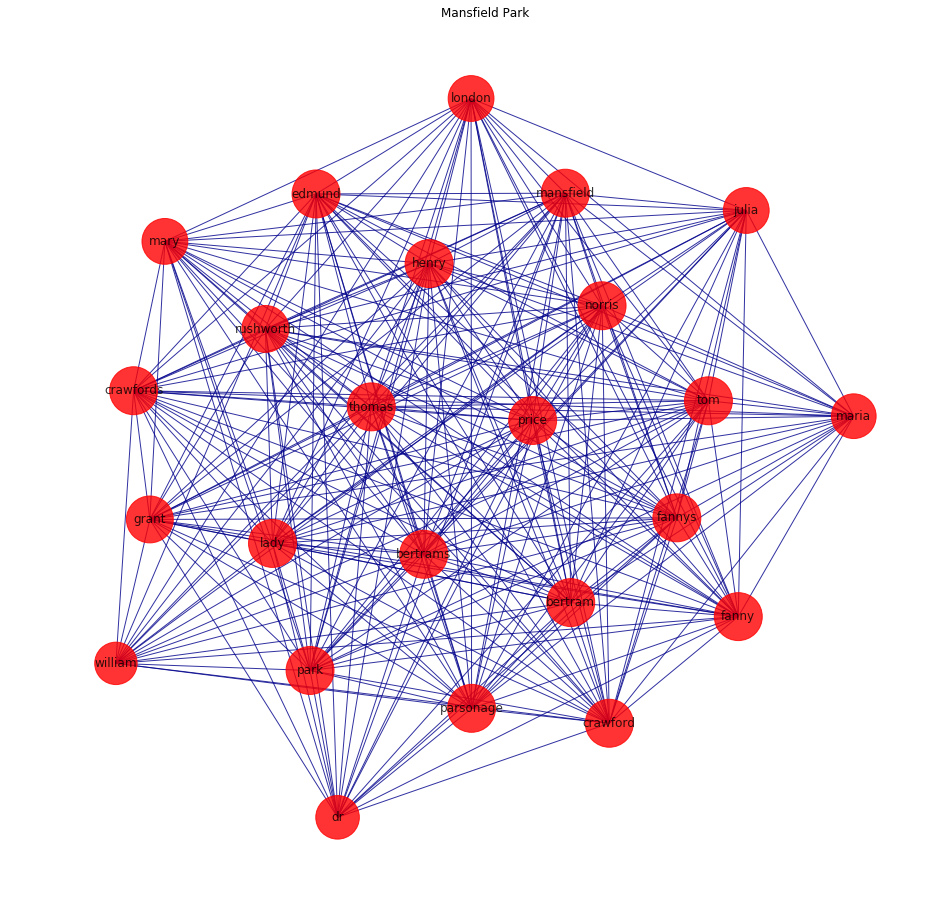

In [334]:
plt.figure(figsize=(16,16))
plt.title('Mansfield Park')
nx.draw(G,pos=nx.spring_layout(G),alpha=0.8,edge_color='darkblue',with_labels=True,
       node_size = [v * 100 for v in dict(G.degree).values()]) 